# Sales Prediction for Big Mart Outlets
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. **The aim is to build a predictive model and predict the sales of each product at a particular outlet.**

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 


In [72]:
#Import libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [73]:
#Import the dataset:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [74]:
#Preview the Train
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [75]:
#Preview the test
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [76]:
#Check the dimensions:
train.shape, test.shape

((8523, 12), (5681, 11))

In [77]:
#Lets combine the datasets:
combined=pd.concat([train,test],ignore_index=True)

In [78]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [79]:
combined.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN


In [80]:
#Check info of the data:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [81]:
#Summary Statistics:
combined.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,14204,11765.000000,14204,14204.000000,14204,14204.000000,14204,14204.000000,10188,14204,14204,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDU15,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,8485,NaN,2013,NaN,1559,NaN,4655,5583,9294,NaN
mean,NaN,12.792854,NaN,0.065953,NaN,141.004977,NaN,1997.830681,NaN,NaN,NaN,2181.288914
std,NaN,4.652502,NaN,0.051459,NaN,62.086938,NaN,8.371664,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.710000,NaN,0.027036,NaN,94.012000,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.054021,NaN,142.247000,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.750000,NaN,0.094037,NaN,185.855600,NaN,2004.000000,NaN,NaN,NaN,3101.296400


##### Univariate Analysis:
* Numerical Variables - Distplot
* Categorical Variables - Countplot/Frequency Plot

In [82]:
num_vars=combined.select_dtypes(include='number').columns
num_vars

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [83]:
combined.select_dtypes(include='object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [84]:
cat_vars=['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

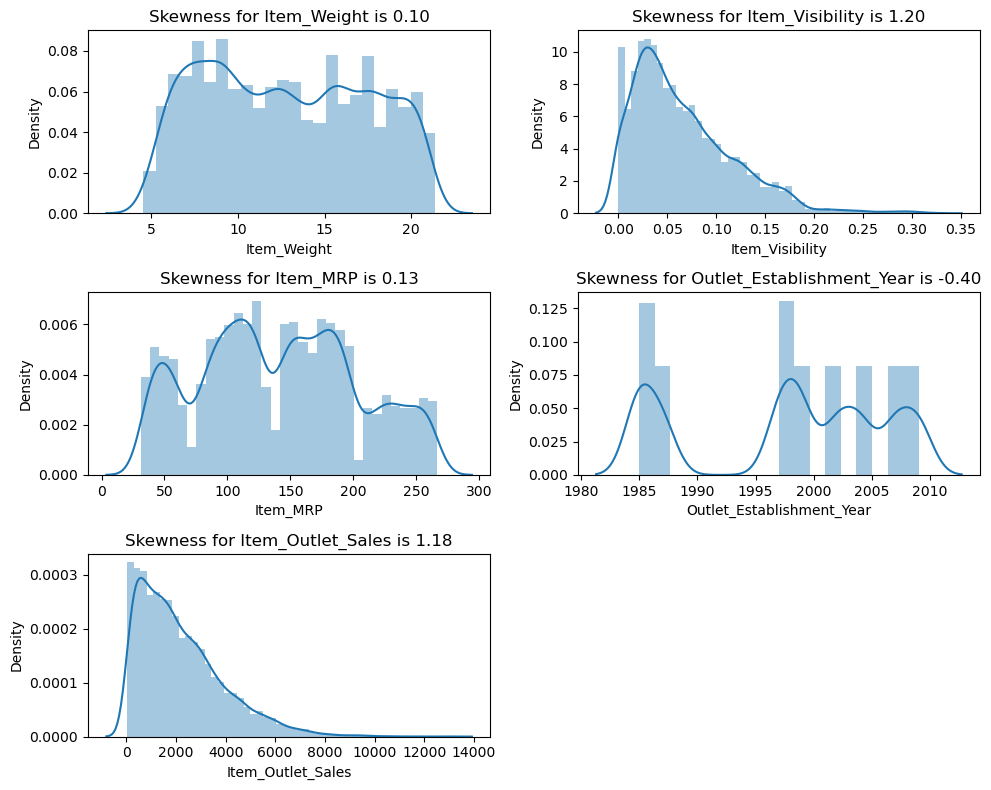

In [85]:
#Plot the numerical variables:
nrows=3
ncols=2
iterator=1
plt.figure(figsize=(10,8))

for i in num_vars:
    plt.subplot(nrows,ncols,iterator)
    sns.distplot(combined.loc[:,i])
    plt.title('Skewness for %s is %.2f'%(i,combined.loc[:,i].skew()))
    iterator+=1
    
plt.tight_layout()
plt.show()

**Inference:**

* Target Variable (Sales) is highly skewed in nature. This means that there are products that have high pricing and at the same time, people are also buying those products.

* MRP seems to have bimodal property, which means that there is no single price that dominates or drives the sales. There are multiple price points that are the deciding factor of the sales.

* Outlet Estd Year us Categorical, therefore, no pattern in the distplot.

* Item Weight, as we see, is Uniform in nature. It means that the Item Weight of all the products falls in a certain range giving a feel of uniformity.

* Item Visibility is skewed, which means some products have a higher visibility than the rest.

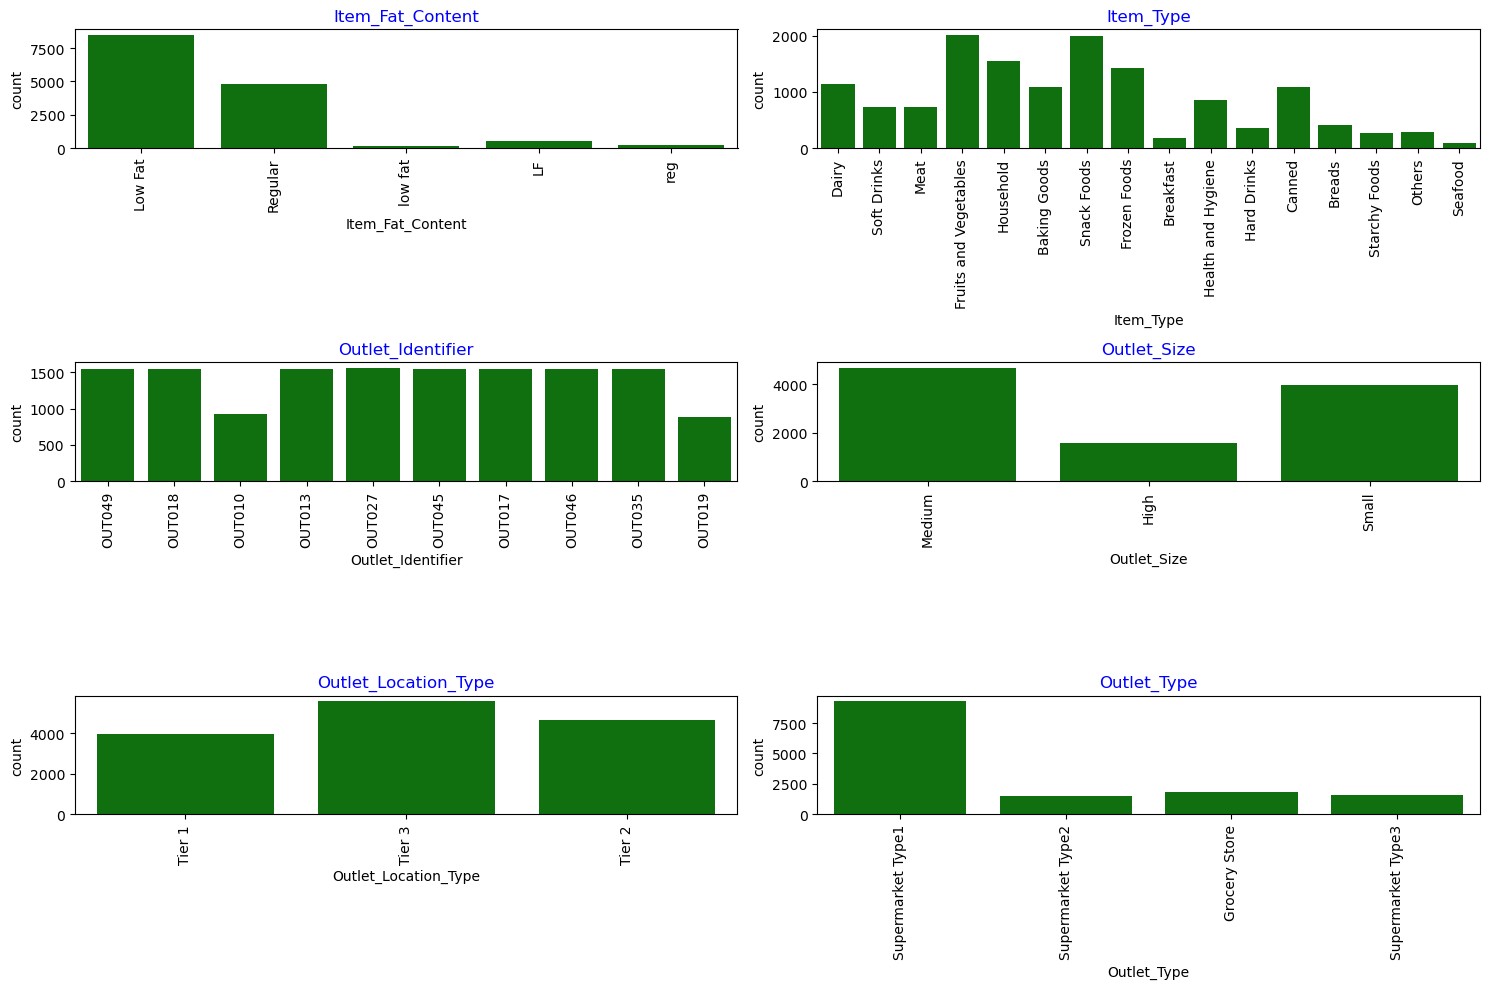

In [86]:
#Plot the categorical variables:
nrows=3
ncols=2
iterator=1
plt.figure(figsize=(15,10))

for i in cat_vars:
    plt.subplot(nrows,ncols,iterator)
    sns.countplot(combined.loc[:,i],color='g')
    plt.xticks(rotation=90)
    plt.title(i,color='b')
    iterator+=1
    
plt.tight_layout()
plt.show()

In [87]:
#Item Type: Top 5 items
combined.Item_Type.value_counts()[:5].index

Index(['Fruits and Vegetables', 'Snack Foods', 'Household', 'Frozen Foods',
       'Dairy'],
      dtype='object')

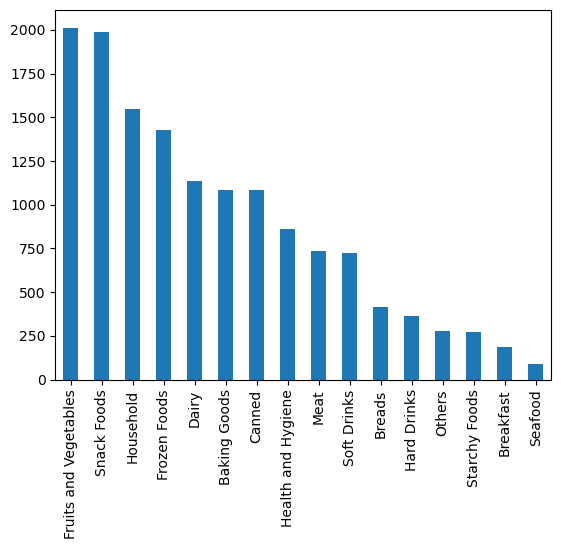

In [88]:
combined.Item_Type.value_counts().plot(kind='bar')
plt.show()

In [89]:
#Outlet Identifier:
combined.Outlet_Identifier.value_counts()

OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

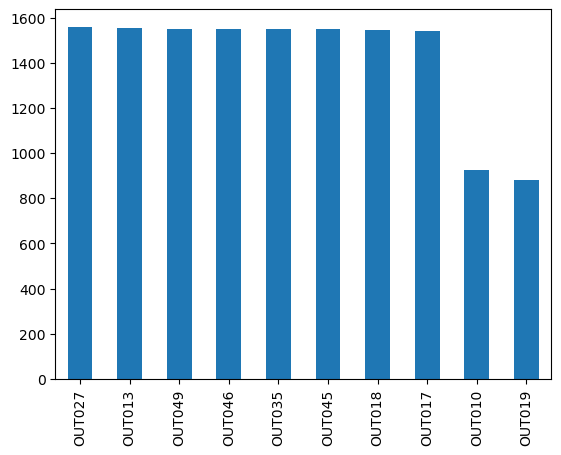

In [90]:
combined.Outlet_Identifier.value_counts().plot(kind='bar')
plt.show()

* Two outlets with the lowest frequency: OUT010 and OUT019

In [91]:
#Fix the Item_Fat_Content:
combined.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [92]:
combined.Item_Fat_Content.replace(to_replace=['LF','low fat','reg'],
                                  value=['Low Fat','Low Fat','Regular'],
                                 inplace=True)

In [93]:
combined.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

##### Bivariate Analysis:
* Num vs Num - ScatterPlot
* Cat vs Num - BoxPlot

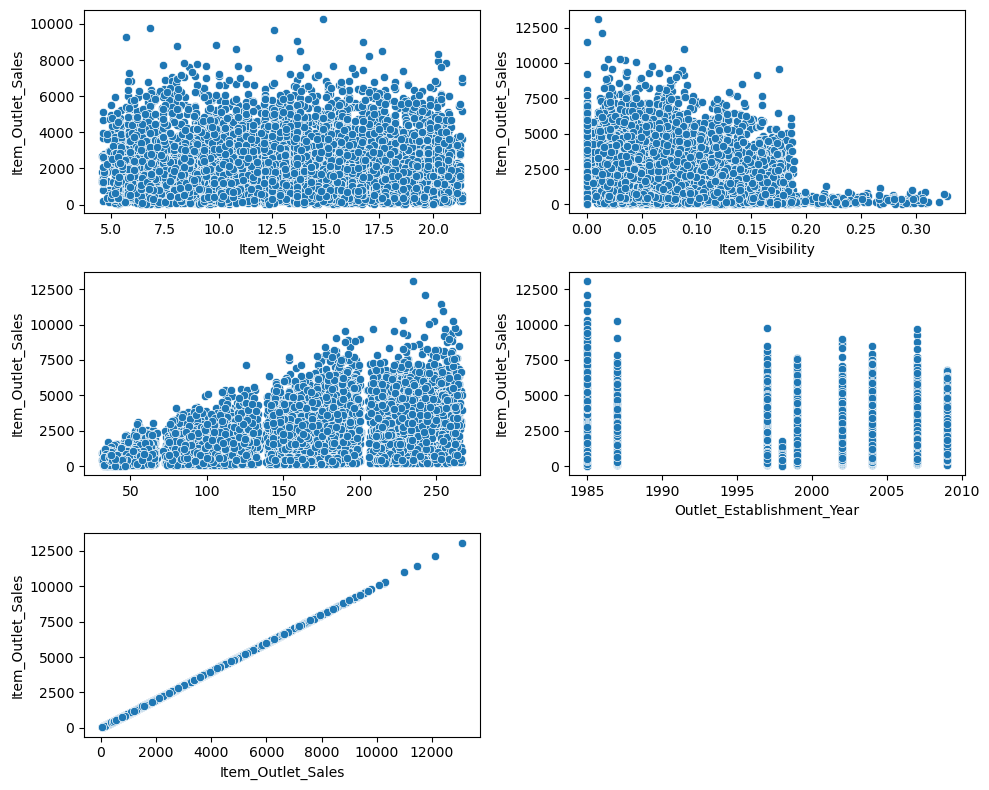

In [94]:
nrows=3
ncols=2
iterator=1
plt.figure(figsize=(10,8))

for i in num_vars:
    plt.subplot(nrows,ncols,iterator)
    sns.scatterplot(combined.loc[:,i],combined.Item_Outlet_Sales)
    iterator+=1
    
plt.tight_layout()
plt.show()

**Inference:**

* Item Weight has no pattern with the outlet sales. It means the Correlation will also be very low.

* However, we see a strong pattern with MRP. this means the MRP can be a strong predictor for the target.

* Item Visibility has a negative correlation with Sales. As the visisbility increases, Sales decreases.
* There are lots of 0s in Item Visibility.

**Missing Values:**
* There are 3 features which have missing values: Item Visibility (0s), Item Weight & Outlet Size.

In [95]:
#Generate the list of missing values:
combined.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [96]:
combined[combined.Item_Weight.isnull()]['Item_Identifier']

7        FDP10
18       DRI11
21       FDW12
23       FDC37
29       FDC14
         ...  
14178    FDX32
14179    FDC39
14184    DRG37
14188    DRE03
14192    FDN31
Name: Item_Identifier, Length: 2439, dtype: object

In [97]:
combined[combined.Item_Identifier=='FDP10']['Item_Weight'].median()

19.0

In [98]:
#Missing Item_Weight:

In [99]:
combined['Item_Weight']=combined.groupby('Item_Identifier')['Item_Weight'].apply(lambda x: x.fillna(x.mean()))

In [100]:
combined.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [101]:
#Item_Visibility=0:

In [102]:
combined['Item_Visibility']=combined.groupby('Item_Identifier')['Item_Visibility'].apply(lambda x:x.replace(to_replace=0,value=x.mean()))

In [103]:
combined[combined.Item_Visibility==0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


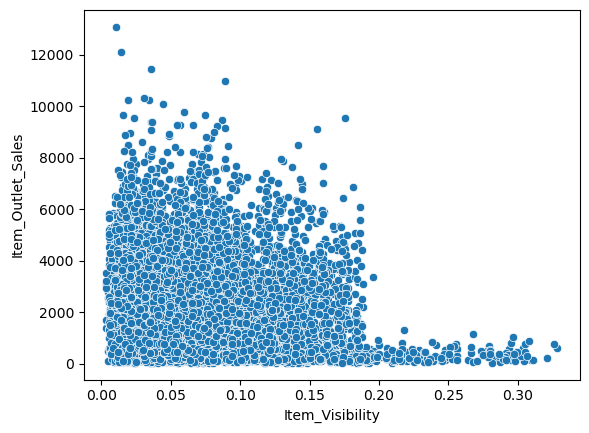

In [104]:
sns.scatterplot(combined.Item_Visibility,combined.Item_Outlet_Sales)
plt.show()

In [105]:
#Outlet_Size:
pd.DataFrame(combined.groupby('Outlet_Type')['Outlet_Size'].value_counts()).T

Outlet_Type Grocery Store Supermarket Type1              Supermarket Type2  \
Outlet_Size         Small             Small  High Medium            Medium   
Outlet_Size           880              3100  1553   1550              1546   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  
Outlet_Size              1559

In [106]:
combined.loc[combined.Outlet_Size.isnull(),'Outlet_Type'].unique()

array(['Grocery Store', 'Supermarket Type1'], dtype=object)

In [107]:
#Imputing small where Outlet_Size is grocery:
combined.loc[(combined.Outlet_Type=='Grocery Store') & (combined.Outlet_Size.isnull()),'Outlet_Size']='Small'

In [108]:
combined[(combined.Outlet_Type=='Grocery Store') & (combined.Outlet_Size.isnull())]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [109]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [110]:
combined.groupby(['Outlet_Type','Outlet_Size'])['Outlet_Identifier'].value_counts()

Outlet_Type        Outlet_Size  Outlet_Identifier
Grocery Store      Small        OUT010                925
                                OUT019                880
Supermarket Type1  High         OUT013               1553
                   Medium       OUT049               1550
                   Small        OUT035               1550
                                OUT046               1550
Supermarket Type2  Medium       OUT018               1546
Supermarket Type3  Medium       OUT027               1559
Name: Outlet_Identifier, dtype: int64

In [111]:
#Supermarket Type 1:
combined.loc[(combined.Outlet_Type=='Supermarket Type1') & (combined.Outlet_Size.isnull()),'Outlet_Size']='Small'

In [112]:
combined.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

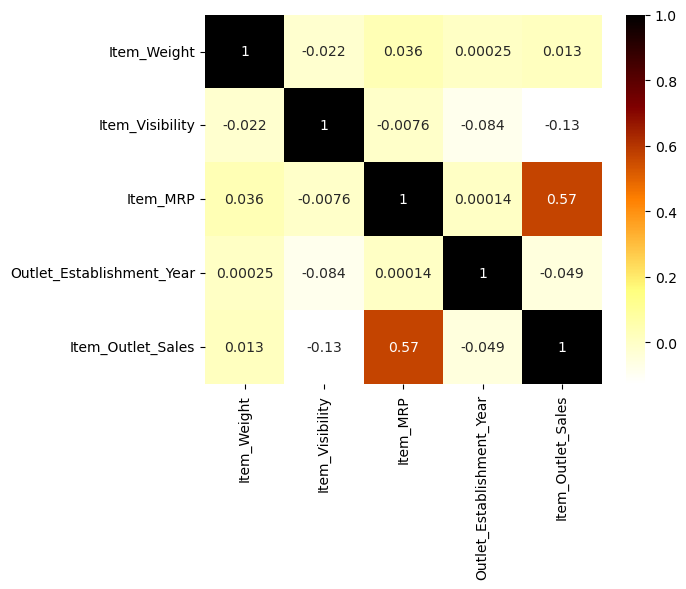

In [113]:
#Generate the correlation plot:

sns.heatmap(combined.loc[:,num_vars].corr(),annot=True,cmap='afmhot_r')
plt.show()

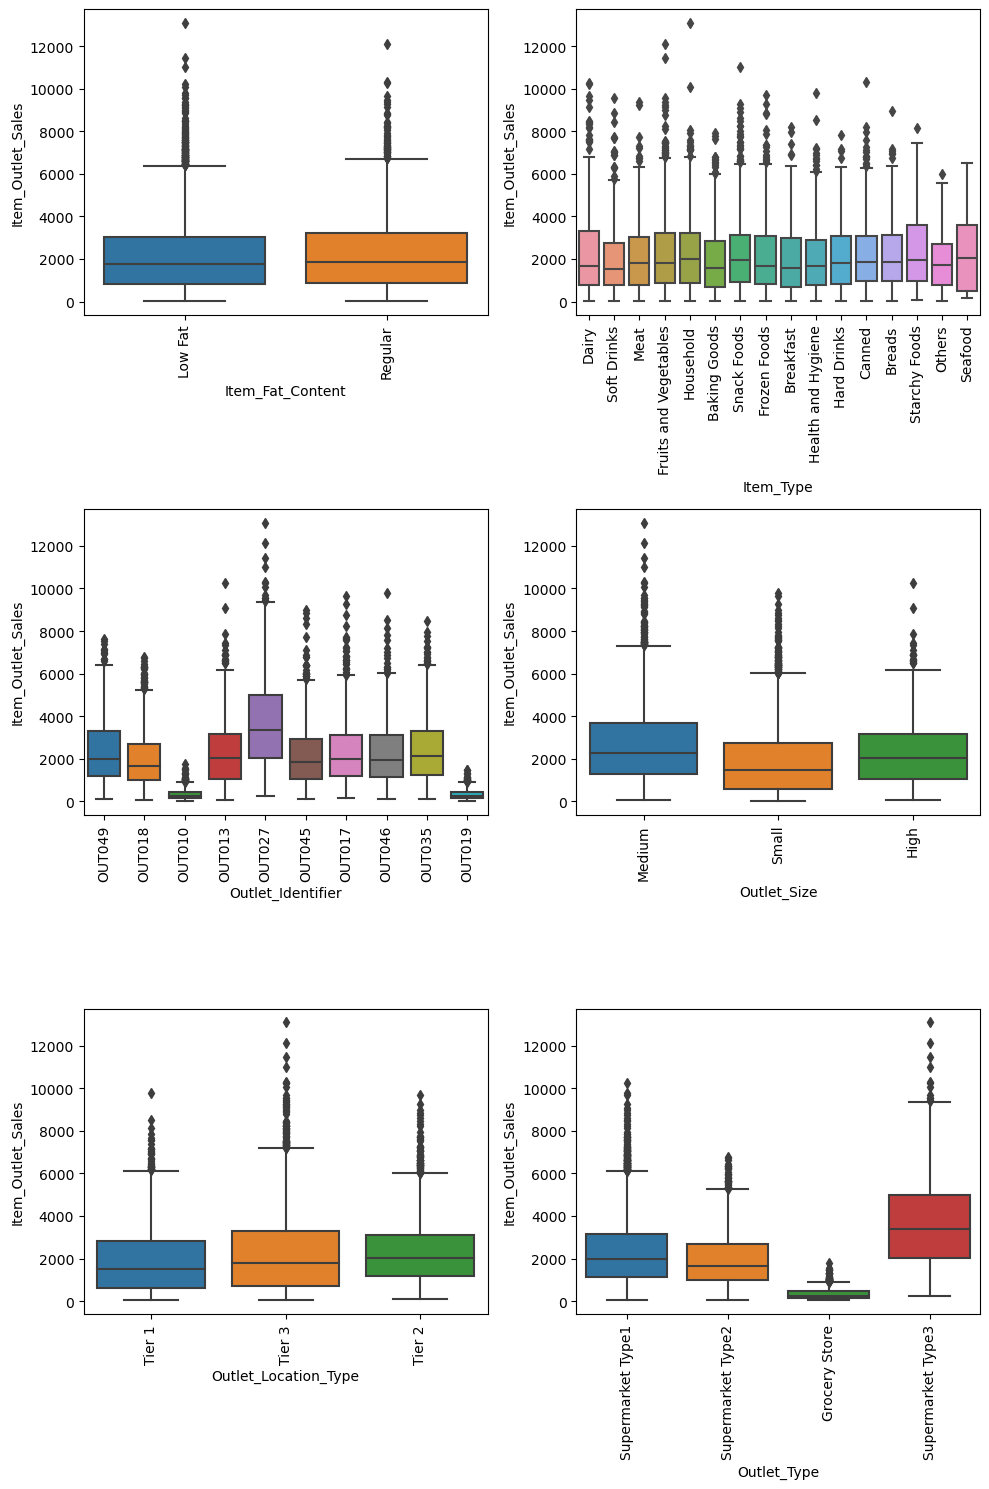

In [114]:
#Cat vs Num:
nrows=3
ncols=2
iterator=1
plt.figure(figsize=(10,15))

for i in cat_vars:
    plt.subplot(nrows,ncols,iterator)
    sns.boxplot(combined.loc[:,i],combined.Item_Outlet_Sales)
    plt.xticks(rotation=90)
    iterator+=1
    
plt.tight_layout()
plt.show()

**Inference:**
* We have Tier 3 having highest Sales, followed by Supermarket Type3 and medium size make a lot of money.

* The outlet ID, max sales is by OUT027.

* OUT010 & OUT019 are the weak performers in the business.

* Grocery Store in Outlet Types have the lowest Sales.

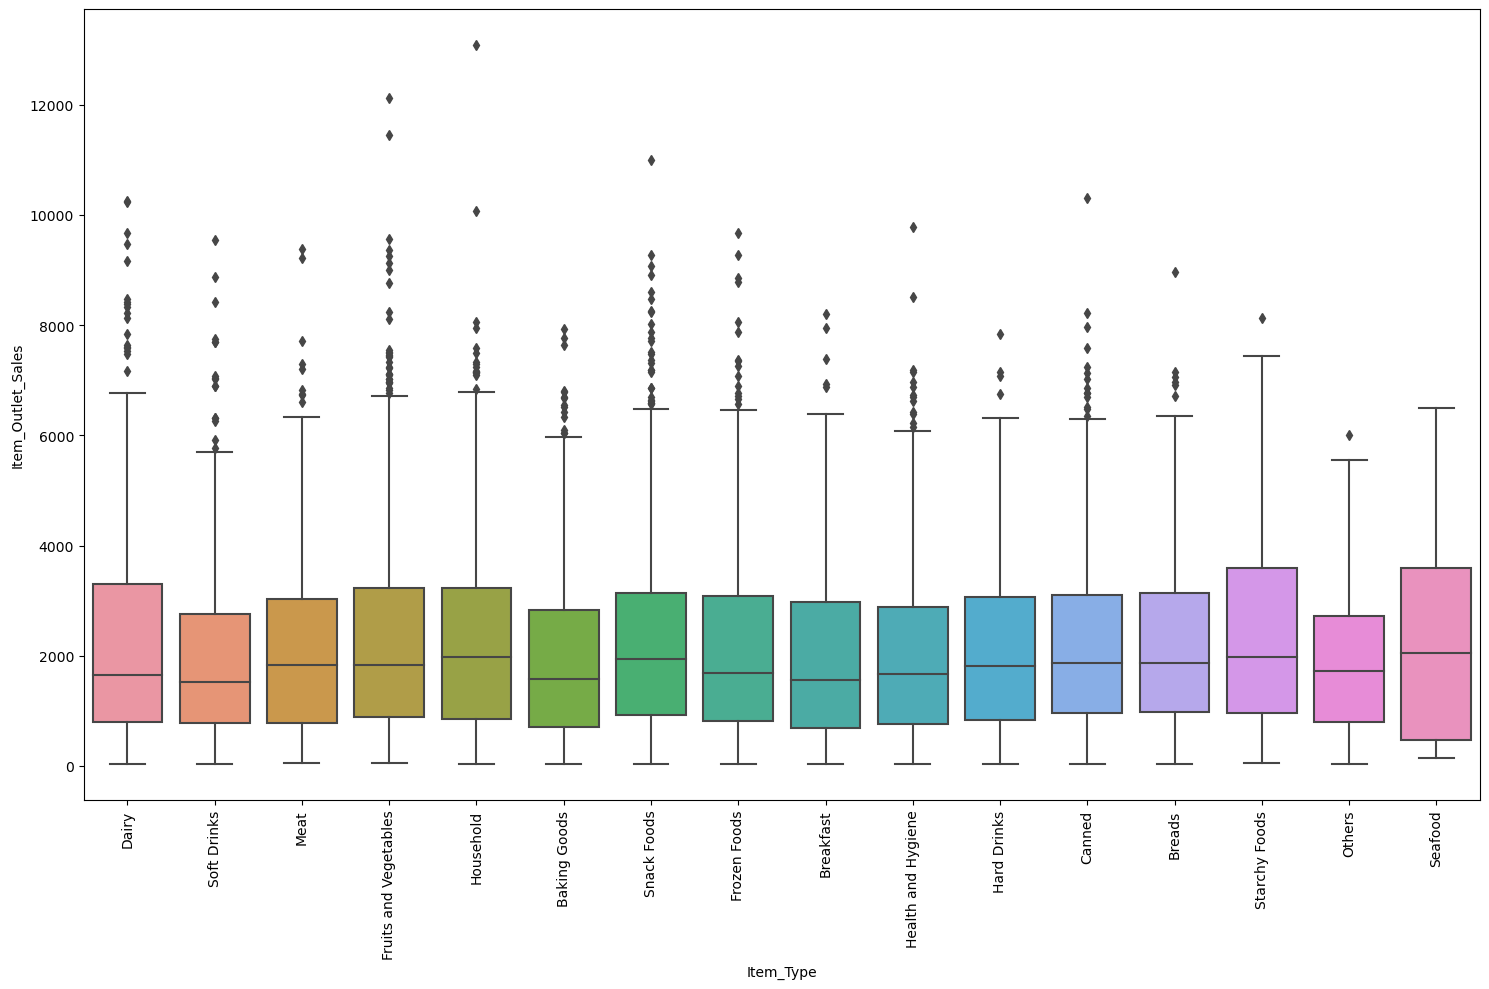

In [115]:
#Item Type vs Sales:
plt.figure(figsize=(15,10))
sns.boxplot(combined.Item_Type, combined.Item_Outlet_Sales)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##### Outlier Identification:

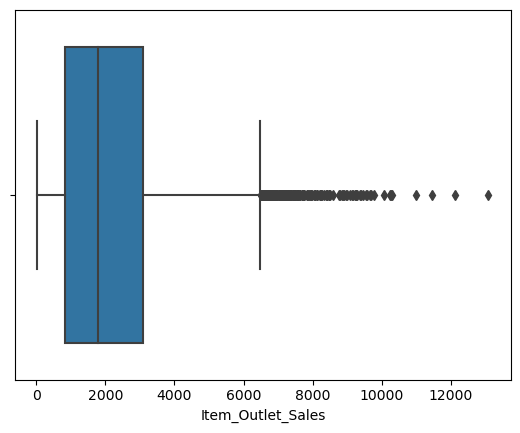

In [116]:
sns.boxplot(combined.Item_Outlet_Sales)
plt.show()

In [117]:
q1=train.Item_Outlet_Sales.quantile(0.25)
q3=train.Item_Outlet_Sales.quantile(0.75)

IQR=q3-q1

upper=q3+1.5*IQR
lower=q1-1.5*IQR

wt_outliers=train[~((train.Item_Outlet_Sales>upper)|(train.Item_Outlet_Sales<lower))]

In [118]:
wt_outliers.shape

(8337, 12)

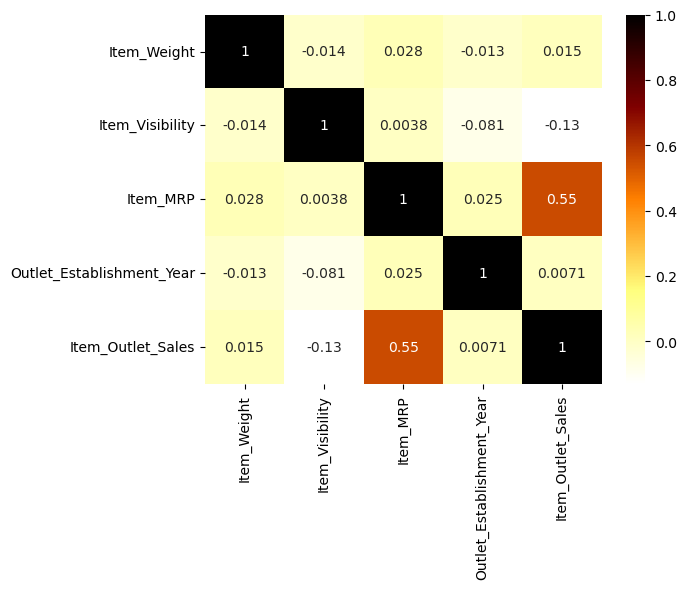

In [119]:
sns.heatmap(wt_outliers.loc[:,num_vars].corr(),annot=True,cmap='afmhot_r')
plt.show()

#IQR method:
* 186 rows dropped
* Correlation is NOT improving

In [120]:
#Apply Winsorization:
from scipy.stats.mstats import winsorize

In [121]:
new=combined.copy()

for i in new.columns:
    winsorized_data=winsorize(a=new.loc[:,i],limits=(0.01,0.01))
    new[i+'_winsorized']=winsorized_data

In [122]:
new.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Identifier_winsorized',
       'Item_Weight_winsorized', 'Item_Fat_Content_winsorized',
       'Item_Visibility_winsorized', 'Item_Type_winsorized',
       'Item_MRP_winsorized', 'Outlet_Identifier_winsorized',
       'Outlet_Establishment_Year_winsorized', 'Outlet_Size_winsorized',
       'Outlet_Location_Type_winsorized', 'Outlet_Type_winsorized',
       'Item_Outlet_Sales_winsorized'],
      dtype='object')

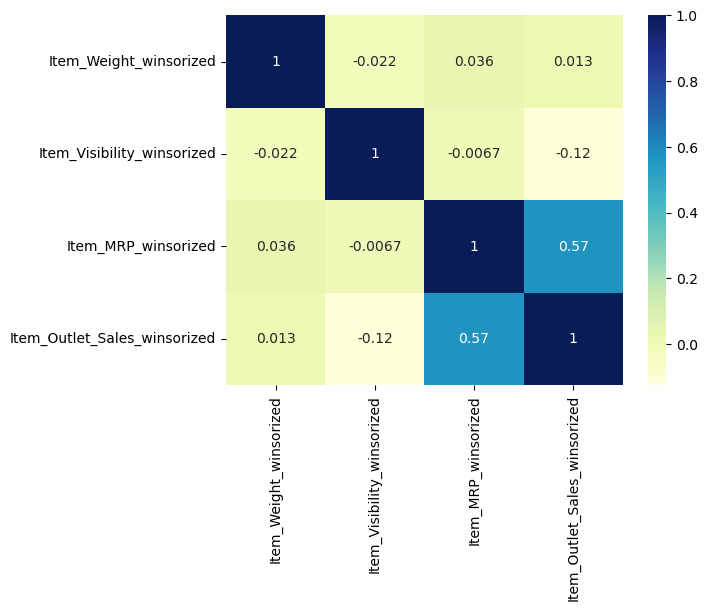

In [123]:
cols=['Item_Weight_winsorized', 'Item_Visibility_winsorized',
       'Item_MRP_winsorized','Item_Outlet_Sales_winsorized']
sns.heatmap(new.loc[:,cols].corr(),annot=True,cmap='YlGnBu')
plt.show()

**Inference:**
* There is no change in correlation between Num Vars after winsorization.

In [124]:
del(new)

##### Feature Engineering:

In [125]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [126]:
#Extract the first two letters from ItemID:
combined.Item_Identifier[0][:2]

'FD'

In [127]:
ids=[]
for i in combined.Item_Identifier:
    ids.append(i[:2])

In [128]:
#create a new variable in the dataset:
combined['Item_Ids']=pd.Series(ids)

In [129]:
#Where it is NC in Item_Ids, we will replace low fat with Non Edible in Item_Fat_content:
combined.loc[(combined.Item_Ids=='NC')&(combined.Item_Fat_Content=='Low Fat'),
             'Item_Fat_Content']='Non Edible'

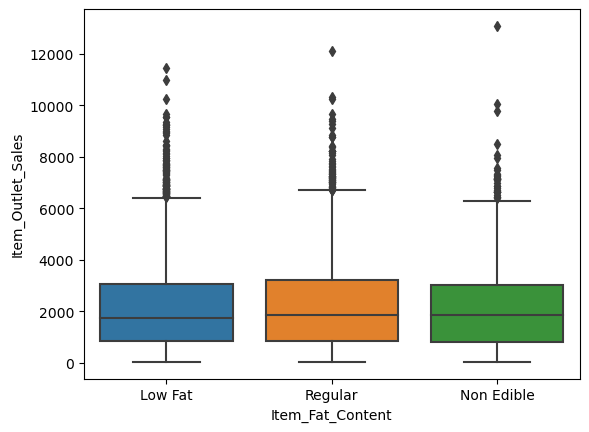

In [130]:
#Plot:
sns.boxplot(combined.Item_Fat_Content, combined.Item_Outlet_Sales)
plt.show()

In [131]:
combined.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [132]:
perishables=['Dairy', 'Meat', 'Fruits and Vegetables',
       'Breakfast', 'Breads', 'Seafood']

In [133]:
def perish(x):
    if x in perishables:
        return('Perishable')
    else:
        return('Non_Perishable')

In [134]:
combined['Item_Type_Cat']=combined.Item_Type.apply(perish)

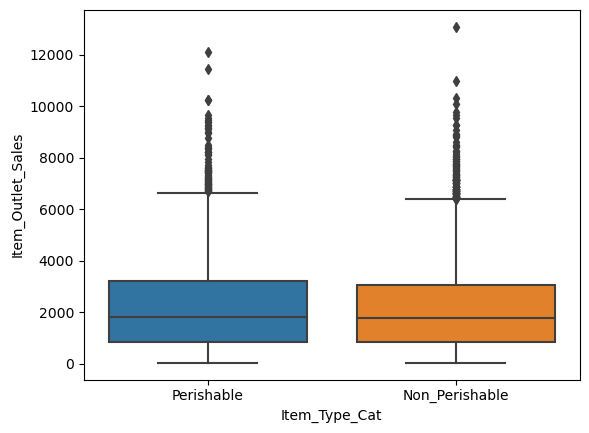

In [135]:
sns.boxplot(combined.Item_Type_Cat,combined.Item_Outlet_Sales)
plt.show()

In [136]:
#Price per Unit:
combined['Price_Per_Unit']=combined['Item_MRP']/combined['Item_Weight']

In [137]:
#Vintage of the Outlet
combined['Vintage']=2013-combined.Outlet_Establishment_Year

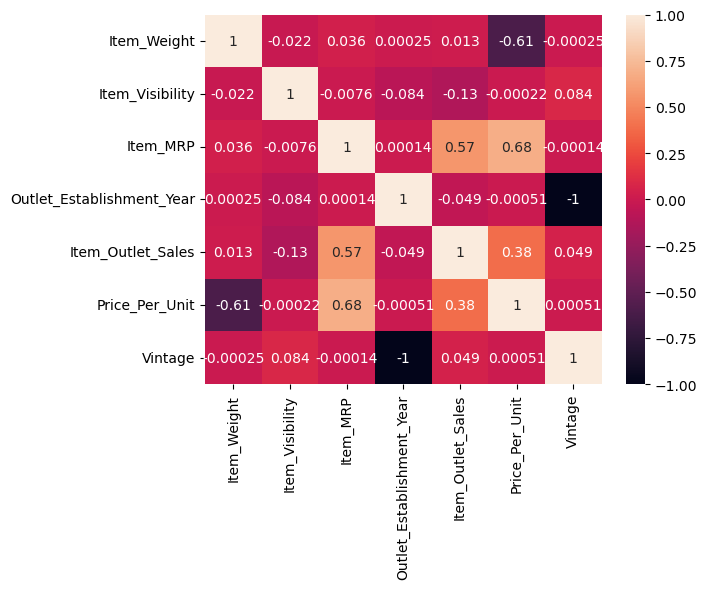

In [138]:
sns.heatmap(combined.corr(),annot=True)
plt.show()

In [139]:
#Target Encoding:

In [140]:
combined.groupby('Outlet_Identifier')['Item_Outlet_Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Outlet_Identifier,,,,,,,,
OUT010,555.0,339.351662,271.014855,33.2900,154.13270,250.3408,455.40720,1775.6886
OUT013,932.0,2298.995256,1533.531664,73.2380,1072.60380,2050.6640,3166.37835,10256.6490
OUT017,926.0,2340.675263,1550.778025,143.8128,1195.94325,2005.0567,3096.46935,9664.7528
OUT018,928.0,1995.498739,1375.932889,69.2432,981.55565,1655.1788,2702.64865,6768.5228
OUT019,528.0,340.329723,249.979449,33.9558,153.63335,265.3213,460.73360,1482.0708
OUT027,935.0,3694.038558,2127.760054,241.6854,2044.33890,3364.9532,4975.52340,13086.9648
OUT035,930.0,2438.841866,1538.512533,113.8518,1238.88735,2109.2544,3310.35760,8479.6288
OUT045,929.0,2192.384798,1462.399658,99.8700,1068.60900,1834.9448,2929.52000,8994.9580
OUT046,930.0,2277.844267,1488.405631,101.8674,1137.18640,1945.8005,3095.63710,9779.9362


In [141]:
#Outlets:
combined['magic1']=combined.groupby('Outlet_Identifier')['Item_Outlet_Sales'].transform('mean')
combined['magic2']=combined.groupby('Outlet_Identifier')['Item_Outlet_Sales'].transform('median')
combined['magic3']=combined.groupby('Outlet_Identifier')['Item_Outlet_Sales'].transform('nunique')
combined['magic4']=combined.groupby('Outlet_Identifier')['Item_Outlet_Sales'].transform('std')
combined['magic5']=combined.groupby('Outlet_Identifier')['Item_Outlet_Sales'].transform('min')
combined['magic6']=combined.groupby('Outlet_Identifier')['Item_Outlet_Sales'].transform('max')

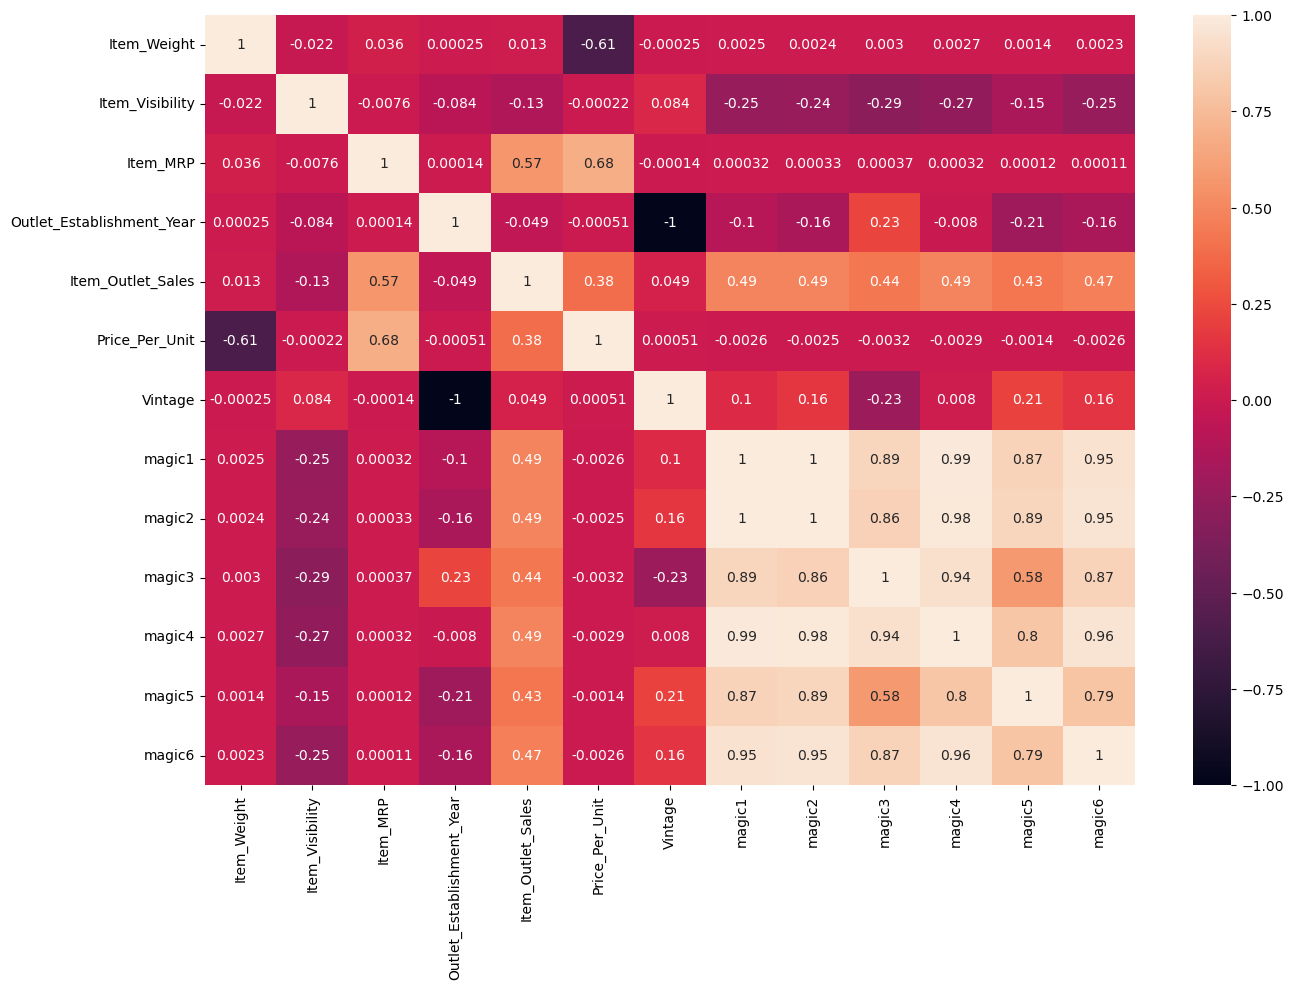

In [142]:
plt.figure(figsize=(15,10))
sns.heatmap(combined.corr(),annot=True)
plt.show()

In [143]:
#Item Type:
combined.groupby('Item_Type')['Item_Outlet_Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Item_Type,,,,,,,,
Baking Goods,648.0,1952.971207,1546.788045,37.2848,705.08220,1577.9460,2823.82425,7931.6754
Breads,251.0,2204.132226,1644.235914,35.2874,968.73900,1860.2452,3145.90500,8958.3390
Breakfast,110.0,2111.808651,1911.693586,39.9480,679.11600,1554.6430,2970.30025,8209.3140
Canned,649.0,2225.194904,1645.235638,37.9506,952.09400,1860.2452,3101.29640,10306.5840
Dairy,682.0,2232.542597,1884.404698,40.6138,788.97300,1650.8511,3296.20935,10256.6490
Frozen Foods,856.0,2132.867744,1724.777720,36.6190,808.94700,1687.1372,3079.49145,9678.0688
Fruits and Vegetables,1232.0,2289.009592,1799.503459,45.2744,884.84820,1830.9500,3227.13260,12117.5600
Hard Drinks,214.0,2139.221622,1606.191587,37.9506,834.91320,1816.6353,3071.33540,7843.1240
Health and Hygiene,520.0,2010.000265,1553.633063,34.6216,758.84555,1669.4935,2884.57850,9779.9362


In [144]:
combined['magic7']=combined.groupby('Item_Type')['Item_Outlet_Sales'].transform('mean')

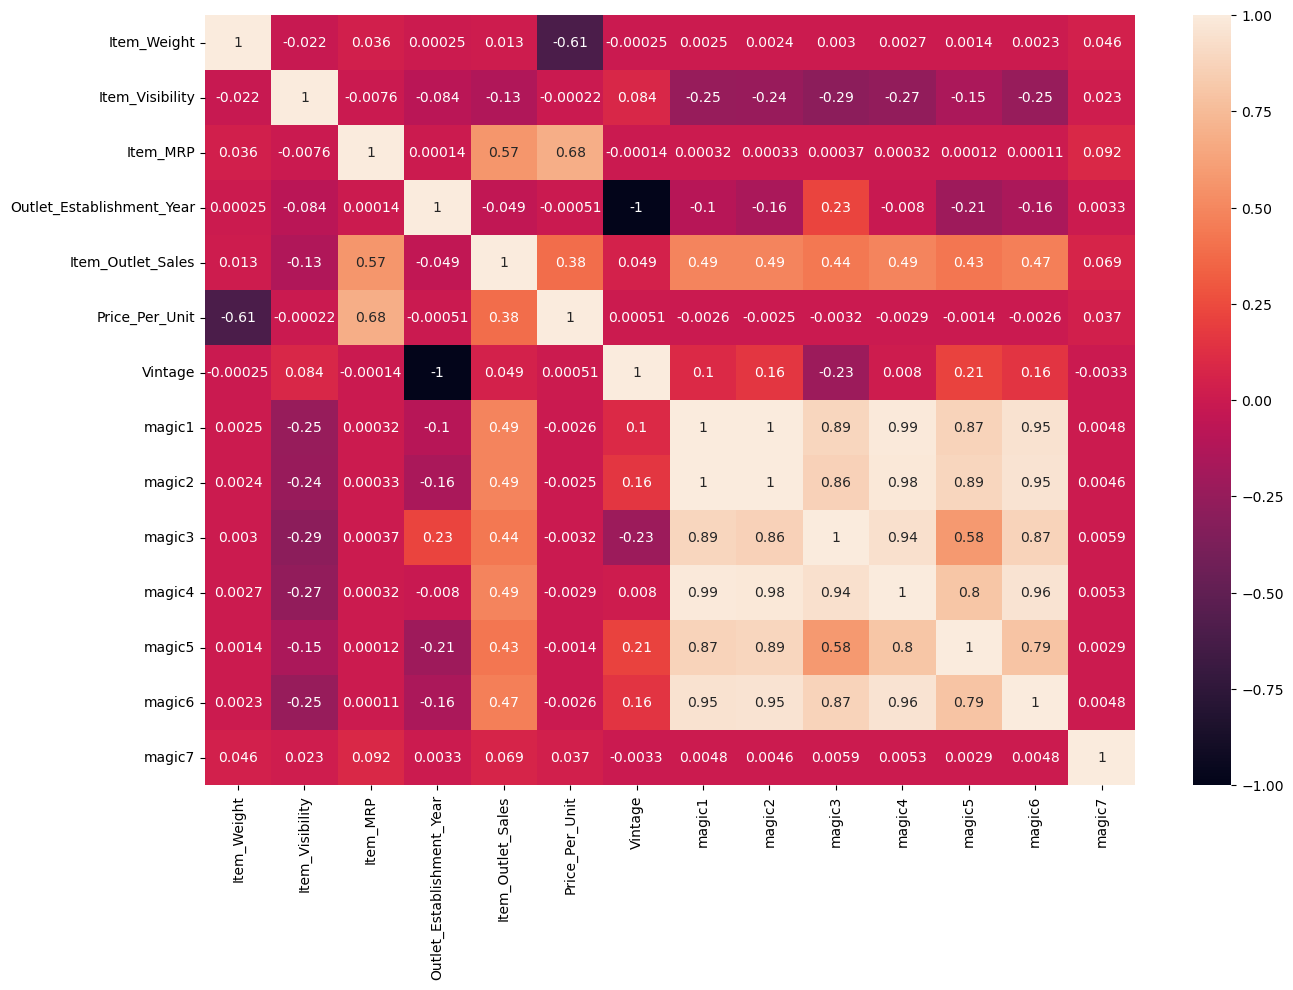

In [145]:
plt.figure(figsize=(15,10))
sns.heatmap(combined.corr(),annot=True)
plt.show()

* As magic7 is not able to generate a good correlation with the target, we don't need it.

In [146]:
#Outlet_Type vs Sales:
combined['magic7']=combined.groupby('Outlet_Type')['Item_Outlet_Sales'].transform('mean')

In [147]:
combined[['magic7','Item_Outlet_Sales']].corr()

,magic7,Item_Outlet_Sales
magic7,1.000000,0.489464
Item_Outlet_Sales,0.489464,1.000000


In [148]:
combined['magic8']=combined.groupby('Outlet_Type')['Item_Outlet_Sales'].transform('median')
combined['magic9']=combined.groupby('Outlet_Type')['Item_Outlet_Sales'].transform('min')
combined['magic10']=combined.groupby('Outlet_Type')['Item_Outlet_Sales'].transform('max')
combined['magic11']=combined.groupby('Outlet_Type')['Item_Outlet_Sales'].transform('std')
combined['magic12']=combined.groupby('Outlet_Type')['Item_Outlet_Sales'].transform('nunique')

In [172]:
combined.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Item_Ids                        0
Item_Type_Cat                   0
Price_Per_Unit                  0
Vintage                         0
magic1                          0
magic2                          0
magic3                          0
magic4                          0
magic5                          0
magic6                          0
magic7                          0
magic8                          0
magic9                          0
magic10                         0
magic11                         0
magic12                         0
dtype: int64

In [166]:
combined.shape

(14204, 28)

In [171]:
combined[combined.magic8==1990.742]['Outlet_Type']

0        Supermarket Type1
2        Supermarket Type1
4        Supermarket Type1
6        Supermarket Type1
8        Supermarket Type1
               ...        
14198    Supermarket Type1
14199    Supermarket Type1
14201    Supermarket Type1
14202    Supermarket Type1
14203    Supermarket Type1
Name: Outlet_Type, Length: 9294, dtype: object

In [149]:
combined.loc[:,['magic7','magic8','magic9','magic10','magic11','magic12','Item_Outlet_Sales']].corr()

,magic7,magic8,magic9,magic10,magic11,magic12,Item_Outlet_Sales
magic7,1.000000,0.998299,0.797615,0.954587,0.989893,0.287261,0.489464
magic8,0.998299,1.000000,0.828556,0.945835,0.979977,0.254348,0.488632
magic9,0.797615,0.828556,1.000000,0.628858,0.708220,-0.264982,0.390387
magic10,0.954587,0.945835,0.628858,1.000000,0.965733,0.554092,0.467234
magic11,0.989893,0.979977,0.708220,0.965733,1.000000,0.373020,0.484518
magic12,0.287261,0.254348,-0.264982,0.554092,0.373020,1.000000,0.140675
Item_Outlet_Sales,0.489464,0.488632,0.390387,0.467234,0.484518,0.140675,1.000000


In [150]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,magic3,magic4,magic5,magic6,magic7,magic8,magic9,magic10,magic11,magic12
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,...,785,1513.289464,111.8544,7646.0472,2316.181148,1990.7420,73.2380,10256.6490,1515.965558,2674
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,...,779,1375.932889,69.2432,6768.5228,1995.498739,1655.1788,69.2432,6768.5228,1375.932889,779
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,...,785,1513.289464,111.8544,7646.0472,2316.181148,1990.7420,73.2380,10256.6490,1515.965558,2674
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,...,391,271.014855,33.2900,1775.6886,339.828500,256.9988,33.2900,1775.6886,260.851582,571
4,NCD19,8.93,Non Edible,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,...,788,1533.531664,73.2380,10256.6490,2316.181148,1990.7420,73.2380,10256.6490,1515.965558,2674


In [151]:
#Drop features that we do not need:
new=combined.drop(['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [152]:
new.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Ids,Item_Type_Cat,...,magic3,magic4,magic5,magic6,magic7,magic8,magic9,magic10,magic11,magic12
0,9.30,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishable,...,785,1513.289464,111.8544,7646.0472,2316.181148,1990.7420,73.2380,10256.6490,1515.965558,2674
1,5.92,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non_Perishable,...,779,1375.932889,69.2432,6768.5228,1995.498739,1655.1788,69.2432,6768.5228,1375.932889,779
2,17.50,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishable,...,785,1513.289464,111.8544,7646.0472,2316.181148,1990.7420,73.2380,10256.6490,1515.965558,2674
3,19.20,Regular,0.017834,182.0950,Small,Tier 3,Grocery Store,732.3800,FD,Perishable,...,391,271.014855,33.2900,1775.6886,339.828500,256.9988,33.2900,1775.6886,260.851582,571
4,8.93,Non Edible,0.009780,53.8614,High,Tier 3,Supermarket Type1,994.7052,NC,Non_Perishable,...,788,1533.531664,73.2380,10256.6490,2316.181148,1990.7420,73.2380,10256.6490,1515.965558,2674


In [153]:
#Lets split data in train & test:
newtrain=new.loc[0:train.shape[0]-1,:]
newtest=new.loc[train.shape[0]:,:]

newtrain.shape, newtest.shape

((8523, 24), (5681, 24))

In [154]:
X=newtrain.drop('Item_Outlet_Sales',axis=1)
y=newtrain.Item_Outlet_Sales
#Drop Item Outlet Sales from test set
newtest=newtest.drop('Item_Outlet_Sales',axis=1)

##### Statistical Analysis:

In [155]:
import scipy.stats as stats

In [156]:
newtrain.select_dtypes(include='number').columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Price_Per_Unit', 'Vintage', 'magic1', 'magic2', 'magic3', 'magic4',
       'magic5', 'magic6', 'magic7', 'magic8', 'magic9', 'magic10', 'magic11',
       'magic12'],
      dtype='object')

In [157]:
#Lets perform Two Sample TTest on Num Vars:
nums=['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Price_Per_Unit', 'Vintage', 'magic1', 'magic2', 'magic3', 'magic4',
       'magic5', 'magic6', 'magic7', 'magic8', 'magic9', 'magic10', 'magic11',
       'magic12']

for i in nums:
    teststats,pvalue=stats.ttest_ind(newtrain.loc[:,i],newtrain.Item_Outlet_Sales)
    print('pvalue for',i,pvalue)

pvalue for Item_Weight 0.0
pvalue for Item_Visibility 0.0
pvalue for Item_MRP 0.0
pvalue for Price_Per_Unit 0.0
pvalue for Vintage 0.0
pvalue for magic1 0.9999999999999825
pvalue for magic2 3.1784715029457972e-49
pvalue for magic3 0.0
pvalue for magic4 0.0
pvalue for magic5 0.0
pvalue for magic6 0.0
pvalue for magic7 1.0
pvalue for magic8 3.389157119244379e-48
pvalue for magic9 0.0
pvalue for magic10 0.0
pvalue for magic11 0.0
pvalue for magic12 3.3373511221478586e-18


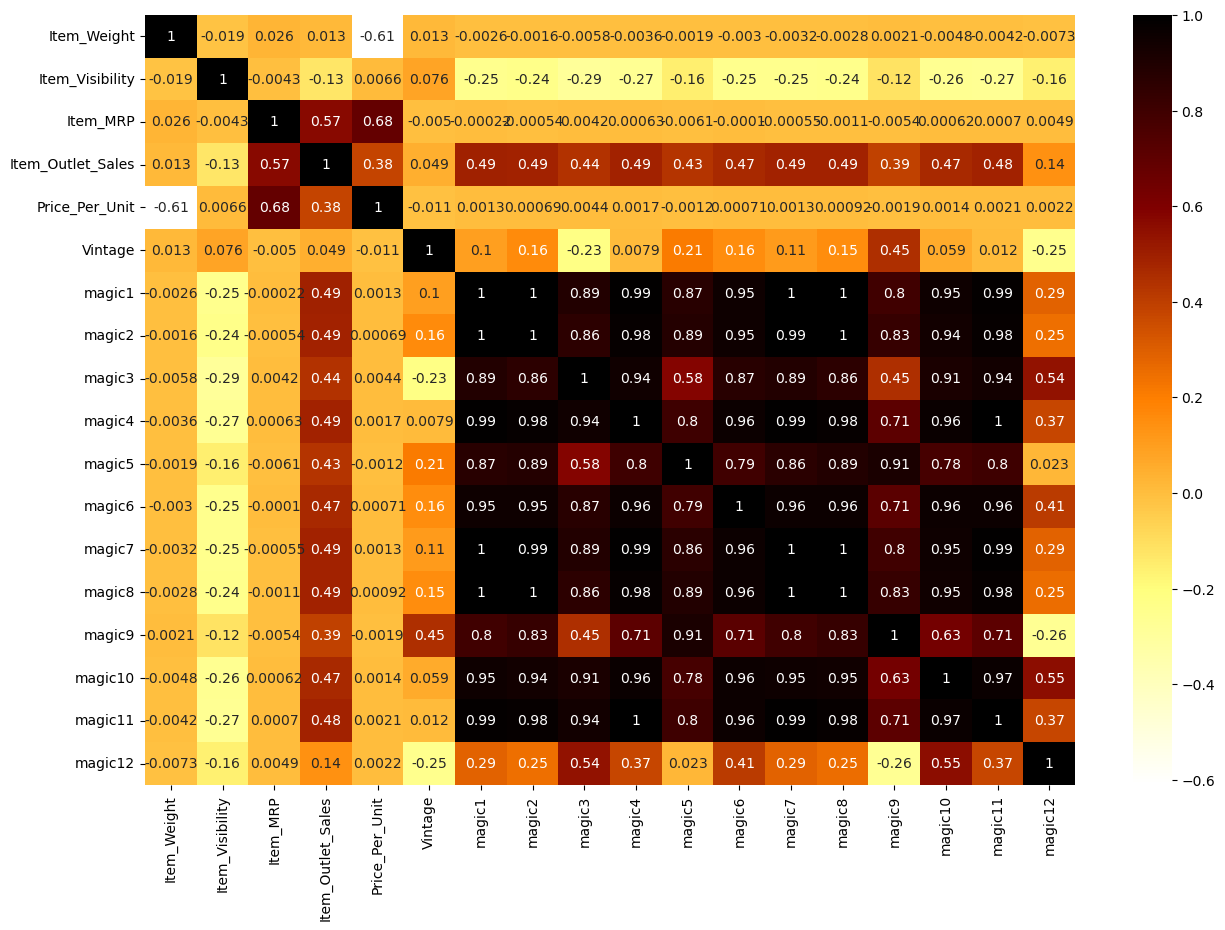

In [158]:
plt.figure(figsize=(15,10))
sns.heatmap(newtrain.corr(),annot=True,cmap='afmhot_r')
plt.show()

In [159]:
#Drop magic1 and magic7:
X.drop(['magic1','magic7'],axis=1,inplace=True)
newtest.drop(['magic1','magic7'],axis=1,inplace=True)

In [160]:
#Cat Vars:
newtrain.select_dtypes(include='object').columns

Index(['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Ids', 'Item_Type_Cat'],
      dtype='object')

In [161]:
import statsmodels.formula.api as sfa

model=sfa.ols('Item_Outlet_Sales~Item_Fat_Content+Outlet_Size+Outlet_Location_Type+Outlet_Type+Item_Ids+Item_Type_Cat',data=newtrain).fit()

In [162]:
from statsmodels.stats.anova import anova_lm

anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
Item_Fat_Content,2.0,9.201502e+06,4.600751e+06,2.080158,1.249739e-01
Outlet_Size,2.0,1.184389e+09,5.921943e+08,267.751503,1.692967e-113
Outlet_Location_Type,2.0,1.419529e+09,7.097646e+08,320.909102,4.323114e-135
Outlet_Type,3.0,3.343020e+09,1.114340e+09,503.831548,2.168788e-301
Item_Ids,2.0,2.517805e+07,1.258903e+07,5.691933,3.385918e-03
Item_Type_Cat,1.0,1.203329e+07,1.203329e+07,5.440665,1.969637e-02
Residual,8511.0,1.882404e+10,2.211731e+06,NaN,NaN


In [163]:
#Cat into numbers:
X=pd.get_dummies(X,drop_first=True)
newtest=pd.get_dummies(newtest,drop_first=True)

### Model Building:
* Linear Regression
* Decision Tree
* Random Forest
* Gradient Boosting
* XGB Regressor

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

#Initiate machine instances
lr=LinearRegression()
rf=RandomForestRegressor()
gbm=GradientBoostingRegressor()
xgb=XGBRegressor()

#Initiate KFold instance
kfold=KFold(n_splits=10,shuffle=True,random_state=0)

In [ ]:
#Linear Regression:

pred=[]

for train_index,test_index in kfold.split(X,y):
    xtrain=X.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred.append(lr.fit(xtrain,ytrain).predict(newtest))

In [ ]:
predicted=np.abs(pd.DataFrame(pred).T.mean(axis=1))

In [ ]:
#Prepare the submission file:
submission=pd.DataFrame({'Item_Identifier':test.Item_Identifier,
                        'Outlet_Identifier':test.Outlet_Identifier,
                        'Item_Outlet_Sales':predicted})
submission.head()

In [ ]:
submission.to_csv('Bigmart_LR.csv',index=False)
#1192

In [ ]:
#Random Forest Model:

pred_rf=[]

for train_index,test_index in kfold.split(X,y):
    xtrain=X.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred_rf.append(rf.fit(xtrain,ytrain).predict(newtest))

In [ ]:
predicted=np.abs(pd.DataFrame(pred_rf).T.mean(axis=1))

#Prepare the submission file:
submission=pd.DataFrame({'Item_Identifier':test.Item_Identifier,
                        'Outlet_Identifier':test.Outlet_Identifier,
                        'Item_Outlet_Sales':predicted})
submission.head()

In [ ]:
submission.to_csv('Bigmart_RFM.csv',index=False)
#1190.3

In [ ]:
#GB Model:

pred_gbm=[]

for train_index,test_index in kfold.split(X,y):
    xtrain=X.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred_gbm.append(gbm.fit(xtrain,ytrain).predict(newtest))

In [ ]:
predicted=np.abs(pd.DataFrame(pred_gbm).T.mean(axis=1))

#Prepare the submission file:
submission=pd.DataFrame({'Item_Identifier':test.Item_Identifier,
                        'Outlet_Identifier':test.Outlet_Identifier,
                        'Item_Outlet_Sales':predicted})
submission.head()

In [ ]:
submission.to_csv('Bigmart_GBM.csv',index=False)
#1152.828

In [ ]:
#XGB Model:

pred_xgb=[]

for train_index,test_index in kfold.split(X,y):
    xtrain=X.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred_xgb.append(xgb.fit(xtrain,ytrain).predict(newtest))

In [ ]:
predicted=np.abs(pd.DataFrame(pred_xgb).T.mean(axis=1))

#Prepare the submission file:
submission=pd.DataFrame({'Item_Identifier':test.Item_Identifier,
                        'Outlet_Identifier':test.Outlet_Identifier,
                        'Item_Outlet_Sales':predicted})
submission.head()

In [ ]:
submission.to_csv('Bigmart_XGB.csv',index=False)
#1188

In [ ]:
#Light GBM:
from lightgbm import LGBMRegressor

lgbm=LGBMRegressor()

pred_lgbm=[]

for train_index,test_index in kfold.split(X,y):
    xtrain=X.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred_lgbm.append(lgbm.fit(xtrain,ytrain).predict(newtest))

In [ ]:
predicted=np.abs(pd.DataFrame(pred_lgbm).T.mean(axis=1))

#Prepare the submission file:
submission=pd.DataFrame({'Item_Identifier':test.Item_Identifier,
                        'Outlet_Identifier':test.Outlet_Identifier,
                        'Item_Outlet_Sales':predicted})
submission.head()

In [ ]:
submission.to_csv('Bigmart_LGBM.csv',index=False)
#1172

In [ ]:
#Lets drop the variables magic8 to magic12: (to better the performance)

newx=X.drop(['magic8','magic9','magic10','magic11','magic12'],axis=1)
new_test=newtest.drop(['magic8','magic9','magic10','magic11','magic12'],axis=1)

In [ ]:
#GBM after dropping columns:

pred_gbm2=[]

for train_index,test_index in kfold.split(newx,y):
    xtrain=newx.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred_gbm2.append(gbm.fit(xtrain,ytrain).predict(new_test))

In [ ]:
predicted=np.abs(pd.DataFrame(pred_gbm2).T.mean(axis=1))

#Prepare the submission file:
submission=pd.DataFrame({'Item_Identifier':test.Item_Identifier,
                        'Outlet_Identifier':test.Outlet_Identifier,
                        'Item_Outlet_Sales':predicted})
submission.head()

In [ ]:
submission.to_csv('Bigmart_GBMnew.csv',index=False)
#1152

#### Parameter Tuning of GB Model:

In [ ]:
params={'learning_rate':[0.1,0.01,0.001,0.5],
       'loss':['sqaured_error','absolute_error','huber','quantile'],
       'n_estimators':[100,200,500],
       'criterion':['friedman_mse','squared_error'],
       'min_samples_split':[2,4,6,8]}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid=GridSearchCV(estimator=gbm,
                 param_grid=params,
                 scoring='neg_root_mean_squared_error',
                 cv=5)

In [ ]:
grid.fit(newx,y)

In [ ]:
grid.best_params_

##### Other steps:
* SFS using GBM
* Feature Importance using GBM and try to build another model
* Parameter tuning of GBM, XGB and LightGBM
* Stacking Model